#  Модель для предсказания коэффициента восстановления золота из золотосодержащей руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Задачи проекта
### [Шаг 1. Подготовьте данные](#step1)
#### Шаг 1.1 Откройте файлы и изучите их
#### Шаг 1.2 Проверьте, что эффективность обогащения рассчитана правильно.
#### Шаг 1.3 Проанализируйте признаки, недоступные в тестовой выборке. 
#### Шаг 1.4 Проведите предобработку данных.

### [Шаг 2. Проанализируйте данные](#step2)
#### Шаг 2.1 Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.
#### Шаг 2.2 Сравните распределения размеров гранул сырья на обучающей и тестовой выборках.
#### Шаг 2.3 Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

### [Шаг 3. Постройте модель](#step3)
#### Шаг 3.1 Напишите функцию для вычисления итоговой sMAPE.
#### Шаг 3.2 Обучите разные модели и оцените их качество кросс-валидацией. 

### [Шаг 4. Вывод](#step4)


# Этапы выполнения проекта

## Шаг 1. Подготовим данные. <a id='step1'></a>

In [1]:
!pip install seaborn -U

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 1.1 MB/s eta 0:00:01


In [2]:
!pip install matplotlib -U

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.6 MB 48 kB/s eta 0:00:0101


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor

### Шаг 1.1 Откроем файлы и изучим их

In [4]:
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')


In [5]:
df_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [6]:
df_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [7]:
df_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [8]:
def getInfo(df):
    print(df.info())
    print('Количество дубликатов:',df.duplicated().value_counts())
    res = []
    for column in df:
        res.append((df_full[column].isna().sum()/df_full.shape[0]*100))
    df = pd.DataFrame(res, columns = ['percent'], index=df.columns)
    return df

In [9]:
df_full_nan = getInfo(df_full)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [10]:
df_full_nan.sort_values(by='percent',ascending=False)

,percent
rougher.output.recovery,13.730410
rougher.output.tail_ag,12.048776
rougher.output.tail_au,12.044374
rougher.output.tail_sol,12.044374
rougher.input.floatbank11_xanthate,9.935728
...,...
primary_cleaner.state.floatbank8_b_level,0.189294
primary_cleaner.state.floatbank8_c_level,0.189294
primary_cleaner.state.floatbank8_d_level,0.189294
primary_cleaner.input.feed_size,0.000000


In [11]:
df_full_train = getInfo(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [12]:
df_full_train.sort_values(by='percent',ascending=False)

,percent
rougher.output.recovery,13.730410
rougher.output.tail_ag,12.048776
rougher.output.tail_au,12.044374
rougher.output.tail_sol,12.044374
rougher.input.floatbank11_xanthate,9.935728
...,...
primary_cleaner.state.floatbank8_b_level,0.189294
primary_cleaner.state.floatbank8_c_level,0.189294
primary_cleaner.state.floatbank8_d_level,0.189294
primary_cleaner.input.feed_size,0.000000


In [13]:
df_full_test = getInfo(df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [14]:
df_full_test.sort_values(by='percent',ascending=False)

,percent
rougher.input.floatbank11_xanthate,9.935728
primary_cleaner.input.sulfate,7.083113
primary_cleaner.input.depressant,6.805776
rougher.input.floatbank10_sulfate,5.727241
primary_cleaner.input.xanthate,5.066913
rougher.input.floatbank11_sulfate,2.984680
rougher.state.floatbank10_e_air,2.729354
rougher.input.feed_rate,2.434407
rougher.input.floatbank10_xanthate,2.064624
rougher.input.feed_size,1.932559


<p>Данные содержат большое количество столбцов и большое количество пропусков. Обучающая выборка содержит почти 14% пропусков в столбце rougher.output.recovery. Попробуем их заполнить на этапе обработки данных, либо удалить. </p>
<p>Тестовые данные не содержат в себе определенный ряд столбцов (какой, выясним позже). Есть предположение, что данные идут во временном порядке, поэтому следует их привести к нужному формату и установить данные значения в качестве индекса для дальнейших операций.</p>

Сделаем копии датасетов, и в дальнейшем будем работать с ними.

In [15]:
df_full_copy = df_full.copy()
df_test_copy = df_test.copy()
df_train_copy = df_train.copy()

### Шаг 1.2 Проверим, что эффективность обогащения рассчитана правильно

In [16]:
def recovery(C,F,T):
    recovery = (C * (F - T))/(F * (C - T))*100
    return recovery

In [17]:
x = df_train['rougher.output.concentrate_au']
y = df_train['rougher.input.feed_au']
z = df_train['rougher.output.tail_au']

Сохраним результат расчет в переменную result_recovery, проверим количество нулей в ней и обучающей выборке.

In [18]:
result_recovery = recovery(x,y,z)

In [19]:
result_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

In [20]:
result_recovery.isna().sum()

2283

In [21]:
df_train['rougher.output.recovery'].isna().sum()

2573

Как видно, количество нулей в обучающей выборке больше. Это означает, что часть из них мы можем заполнить по нашему расчету. (Вернемся позже к этому).
<p>Сведем две колонки в один фрейм и расчитаем MAE.</p>

In [22]:
df_results = pd.concat([df_train['rougher.output.recovery'], result_recovery], axis=1, keys=['rougher.output.recovery', 'result'])

In [23]:
df_results

,rougher.output.recovery,result
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
16855,89.574376,89.574376
16856,87.724007,87.724007
16857,88.890579,88.890579
16858,89.858126,89.858126


Получим индексы строк с пустыми значениями и удалим NAN.

In [24]:
train_zeros = df_results[df_results['rougher.output.recovery'].isnull()].index.tolist()

In [25]:
df_results = df_results[~df_results['rougher.output.recovery'].index.isin(train_zeros)].copy()

In [26]:
mean_absolute_error(df_results['rougher.output.recovery'], df_results['result'])

9.444891926100695e-15

Показатель отклонения небольшой, что означает, что расчет выполнен верно.

### Шаг 1.3 Проанализируем признаки, недоступные в тестовой выборке

In [27]:
df_train_columns = df_train.columns
df_test_columns = df_test.columns

In [28]:
print(len(df_train_columns), len(df_test_columns))

87 53


In [29]:
different_columns = df_train_columns[~df_train_columns.isin(df_test_columns)]
different_columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

In [30]:
similar_columns = df_train_columns[df_train_columns.isin(df_test_columns)]
similar_columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

В тестовой выборке отсутствуют данные всех этапов (флотация, первичная и вторичная очистка, финальные характеристики) для параметров продукта. Также в тестовой выборке отсутствуют целевые признаки: rougher.output.recovery — эффективность обогащения чернового концентрата, final.output.recovery — эффективность обогащения финального концентрата


### Шаг 1.4 Проведем предобработку данных

<p>План работ на этом этапе будет происходить с копиями датасетов и будет содержать в себе следующие пункты:</p>
<ul>
    <li>замена типа данных для признака date</li>
    <li>добавление признаков в тестовую выборку целевых фичей, которых есть в полном датасете</li>
    <li>удаление признаков в обучающей выборке, которых нет в тестовой</li>
    <li>обработка пропусков</li>
    <li>построение матрицы корреляции, ее анализ</li>
    <li>построение графика распределения целевого признака final.output.recovery в зависимости от времени.</li>
</ul>


Заменим тип данных для признака date.

In [31]:
datasets_copy = {'Исходные данные': df_full_copy, 
                 'Обучающая выборка': df_train_copy, 
                 'Тестовая выборка': df_test_copy}

In [32]:
for key, value in datasets_copy.items():
    value['date'] = pd.to_datetime(value['date'])
    print(value['date'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


<p>Добавим в тестовую выборку целевые признаки rougher.output.recovery, final.output.recovery из полного датасета, основываясь на дате. </p>


In [33]:
df_test_copy = df_test_copy.merge(df_full_copy[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                           how = 'left', on = 'date')

Из копии обучающей выборки удалим те признаки, которых нет в тестовой. В результате получим датасеты, с одинаковыми признаками для обучения моделей.


In [34]:
useful_cols = list(df_test_copy.columns)
df_train_copy = df_train_copy[useful_cols]

Проверим размеры датасетов:

In [35]:
print('train_copy:', df_train_copy.shape)
print('test_copy:', df_test_copy.shape)

train_copy: (16860, 55)
test_copy: (5856, 55)


Теперь займемся обработкой пропусков. Для начала проверим, есть ли абсолютно пустые строки в дата сетах. 

In [36]:
idx = df_full_copy.index[df_full_copy.isnull().all(1)]
nans = df_full_copy.loc[idx]
nans

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


Отлично. Теперь посмотрим, как выглядят пустые данные, и есть ли какая зависимость от других столбцов.

In [37]:
df_full_copy[df_full_copy['final.output.concentrate_ag'].isnull()]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
746,2016-02-15 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,2016-03-09 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,2016-03-09 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1312,2016-03-09 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,2016-04-04 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20487,2018-05-17 14:59:59,NaN,NaN,NaN,NaN,NaN,10.973703,1.956650,NaN,5.205719,...,30.016229,-398.270850,22.002711,-499.522602,24.980643,-499.283705,22.984288,-500.059916,25.013956,-500.408074
20488,2018-05-17 15:59:59,NaN,NaN,NaN,NaN,NaN,9.987548,1.440766,4.277092,4.050977,...,29.954721,-398.425395,21.946049,-500.062361,24.992471,-500.467714,22.978081,-499.791793,24.992488,-500.157939
22008,2018-07-19 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22009,2018-07-20 00:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_full_copy[df_full_copy['final.output.tail_ag'].isnull()]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
746,2016-02-15 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,2016-03-09 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,2016-03-09 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1312,2016-03-09 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,2016-04-04 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20484,2018-05-17 11:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,-397.807216,0.000000,-499.807123,0.546393,-501.283619,0.750984,-499.839249,0.291439,-512.525065
20485,2018-05-17 12:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.962174,-397.961761,7.947388,-465.830061,9.280648,-498.099009,8.775375,-499.945398,9.426407,-499.663474
22008,2018-07-19 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22009,2018-07-20 00:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Зависимостей никаких нет. Выведем общее количество строк, где встречаются пустные значения.

In [39]:
df_full_copy[df_full_copy.isnull().any(axis=1)]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
47,2016-01-16 23:00:00,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,...,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
48,2016-01-17 00:00:00,5.296830,10.597469,NaN,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,...,14.006476,-549.388727,11.975967,-550.778624,9.989726,-499.607365,7.958252,-498.882560,11.967977,-599.440603
49,2016-01-17 01:00:00,7.256114,9.017677,NaN,43.389252,NaN,12.100582,1.758360,4.606019,3.202483,...,14.032364,-549.326033,11.987133,-549.583570,10.094584,-492.041563,8.054770,-498.802262,11.961330,-597.272218
50,2016-01-17 02:00:00,8.162896,8.877528,NaN,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224,...,13.984906,-550.563329,11.999730,-550.549773,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929
53,2016-01-17 05:00:00,5.919503,11.078044,6.215769,42.922611,71.308281,10.866006,1.577753,17.550397,2.476280,...,13.972224,-548.238797,12.042964,-550.430774,9.989624,-499.606754,7.950446,-500.352648,12.011728,-599.043399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22702,2018-08-17 21:59:59,3.599454,12.308172,6.512304,45.477834,59.871040,8.882691,3.036575,9.421421,1.826293,...,22.988173,-500.989518,20.005718,-500.154032,17.987716,-501.022243,13.020843,-500.218430,20.011456,-499.842173
22703,2018-08-17 22:59:59,3.540800,12.423927,6.702631,45.323979,70.477689,8.866079,2.816357,9.838458,1.439220,...,23.036427,-500.990672,20.023346,-500.147796,18.010037,-500.299851,12.982786,-500.097885,20.003557,-506.135132
22704,2018-08-17 23:59:59,3.573966,12.199649,6.584768,45.440494,74.594019,9.042359,2.980534,9.737694,1.455128,...,23.011485,-500.714430,20.058045,-499.066195,17.990312,-499.278862,13.002126,-499.724599,20.004410,-500.347623
22705,2018-08-18 00:59:59,3.525247,12.121578,6.605982,45.785582,75.185602,9.041052,3.208360,9.792629,1.534906,...,23.035611,-501.134671,19.984883,-501.051735,17.948892,-500.147451,13.009772,-500.081309,20.012084,-501.651764


<p>Как видно, данный показатель достаточно большой. Удалять такой процент данных будет неправильно - нужно заполнять. </p>
<p>Посмотрим на графике как распределяется целевой признак за какой-либо период. </p>

<AxesSubplot:xlabel='date'>

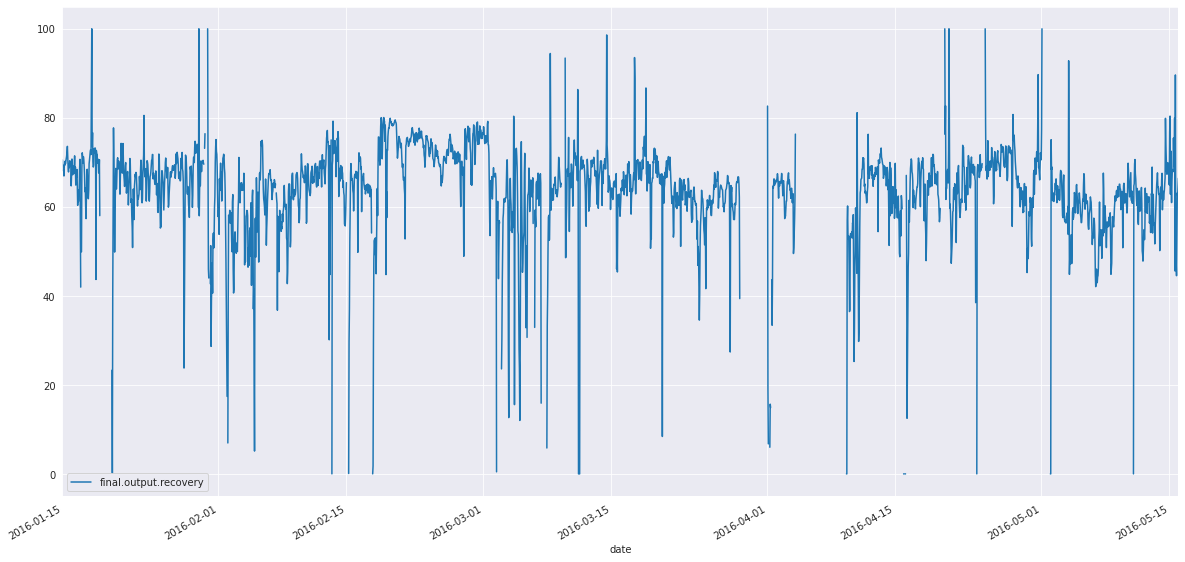

In [40]:
df_full_copy[df_full_copy['date'] < '2016-05-16'].plot(x="date", y="final.output.recovery", figsize=(20,10))


Интересный момент, что на долгом промежутке времени данных вовсе нет. Скорей всего это какая-то техническая ошибка, которая повторяется многократно.  

<p>Удалим строки с пропусками в целевых признаках, и заполним пропуски в данных методов ffil для остальных признаков. Выбор данного метода заполнения объясняется тем, что последнее известное значение перед пропуском будет незначительно искажать данные. </p>

In [41]:
cols = ['rougher.output.recovery', 'final.output.recovery']

df_full_copy.dropna(subset=cols, inplace=True)
df_train_copy.dropna(subset=cols, inplace=True)
df_test_copy.dropna(subset=cols, inplace=True)

In [42]:
df_full_copy = df_full_copy.fillna(method = 'ffill')
df_train_copy = df_train_copy.fillna(method = 'ffill')
df_test_copy = df_test_copy.fillna(method = 'ffill')

Теперь рассмотрим, как влияют параметры на целевые признаки. Для этого построим матрицу корреляции. 

In [43]:
def correlation_heatmap(sample, sample_name):
    plt.figure(figsize=(16, np.ceil(sample.shape[1] / 4.5)))
    plt.suptitle('Correlation matrix for the sample "{}"'.format(sample_name))

    df = sample.corr().abs()
    sns.heatmap(data=df,
                cmap=sns.color_palette('coolwarm', 5),
                linecolor='whitesmoke',
                square=True
                )
    plt.show()
    
    return df

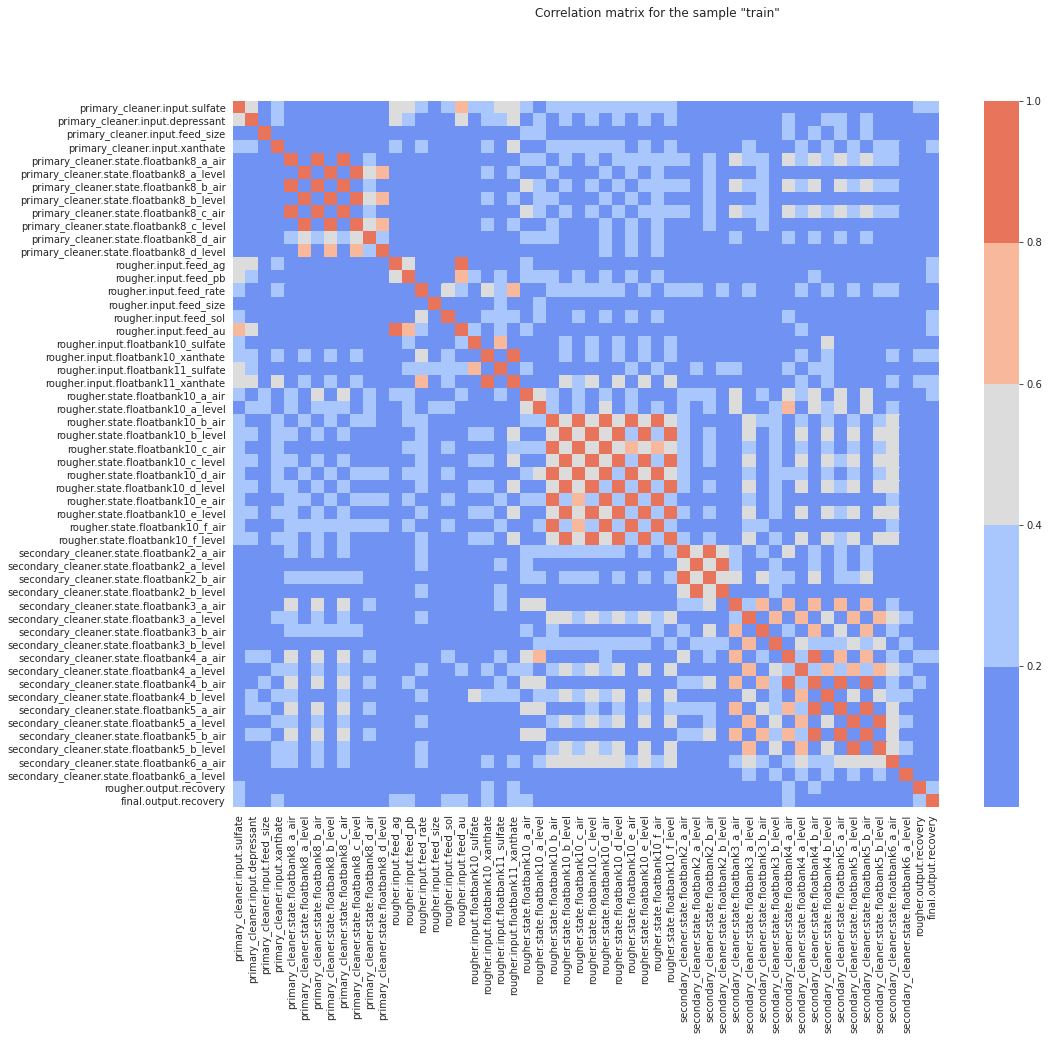

In [44]:
x_train_corr = correlation_heatmap(df_train_copy, 'train')

Как видно, для целевых параметром нет сильной зависимости от других признаков. Таким образом удалять зависимые столбцы нет необходимости. Обучать модель будем на всех признаках датафрейма.

### Вывод
<p>На первом этапе были проведены следующие работы:</p>
<ul>
    <li>загружены и изучены данные</li>
    <li>проверен, что расчет обогащения расчитан корректно</li>
    <li>проанализированы отличающиеся признаки в тестовой и обучающей выборке</li>
    <li>предобработка данных (заменили/удалили пропуски, подготовили новые выборки с одинаковым количеством столбцов, заменили типа для date</li>
</ul>
<p>Переходим к следующему этапу. </p>

## Шаг 2. Проанализируем данные <a id='step2'></a>

### Шаг 2.1 Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Отберем необходимые столбцы, и создадим список с названием металлов. 

In [45]:
columns_ag =['rougher.input.feed_ag', 'rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']
columns_au =['rougher.input.feed_au', 'rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']
columns_pb =['rougher.input.feed_pb', 'rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']


In [46]:
def concentratePlot(df,columns):
    for i in columns:
        sns.kdeplot(x=i,
        #bw_adjust=0.1,
        label=i,
        data=df);
        plt.legend(fontsize = 10);        

Text(0.5, 1.0, 'Концентрация Серебра на различных этапах очистки')

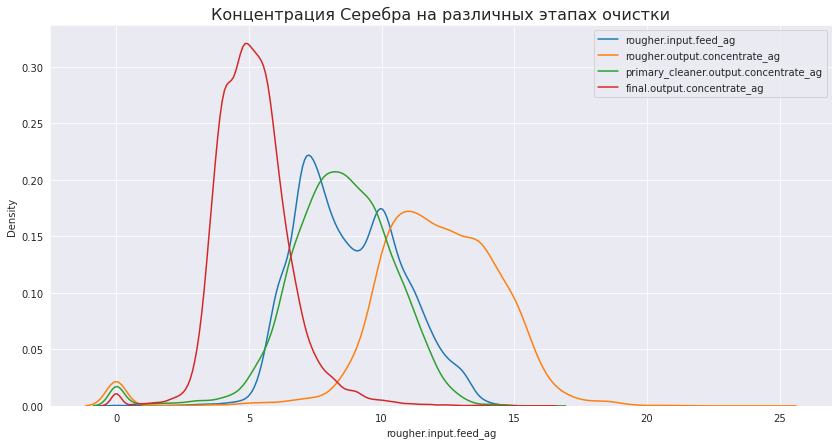

In [47]:
f, ax = plt.subplots(figsize=(14, 7))
concentratePlot(df_full_copy,columns_ag)
plt.title('Концентрация Серебра на различных этапах очистки', fontsize=16)

Text(0.5, 1.0, 'Концентрация Золота на различных этапах очистки')

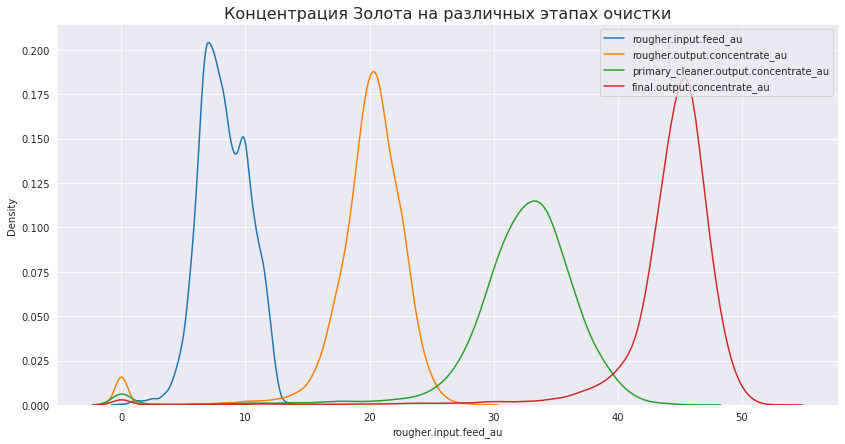

In [48]:
f, ax = plt.subplots(figsize=(14, 7))
concentratePlot(df_full_copy,columns_au)
plt.title('Концентрация Золота на различных этапах очистки', fontsize=16)

Text(0.5, 1.0, 'Концентрация Свинца на различных этапах очистки')

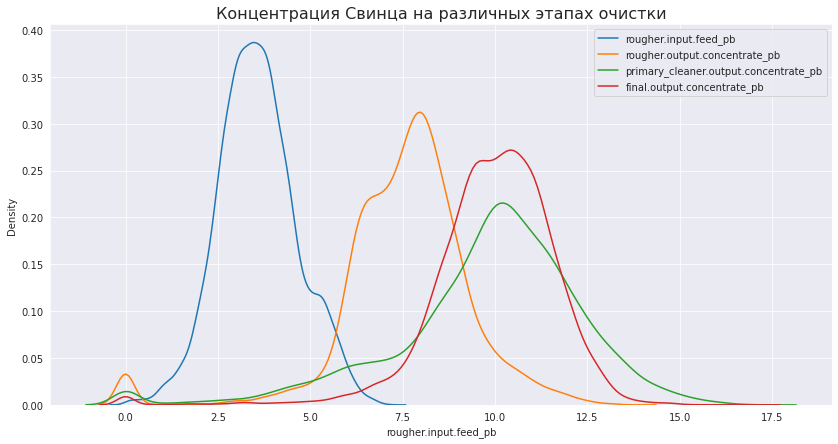

In [49]:
f, ax = plt.subplots(figsize=(14, 7))
concentratePlot(df_full_copy,columns_pb)
plt.title('Концентрация Свинца на различных этапах очистки', fontsize=16)

<p>Краткие выводы</p>
<ul>
<li>Данные по концентрации серебра распределены неравномерно (графики на первоначальном этапе скошены). После прохождения флотации концентрация серебра увеличивается, а на последующих этапах концентрация  уменьшается. </li>
<li>Данные по концентрации золота распределены более равномерно. Концентрация увеличивается на каждом этапе, что соответсвует цели производства</li>
<li>Данные по концентрации свинца увеличиваются до первой очистки. На выходе его столько же, сколько было после первичной очистки. Графики также немного скошены.</li>
</ul>

### Шаг 2.2 Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

Данные о размерах гранулов сырья имеются на этапе флотации и первичной очистки. Их названия - primary_cleaner.input.feed_size, rougher.input.feed_size. Посмотрим на их распределения.

In [50]:
primary_feed_size = 'primary_cleaner.input.feed_size'
rougher_feed_size = 'rougher.input.feed_size'

In [51]:
def feedSize(step):
    f, ax = plt.subplots(figsize=(14, 7))
    sns.kdeplot(x=step,
            label='Тестовая выборка',
            data=df_test_copy);
    sns.kdeplot(x=step,
            label='Обучающая выборка',
            data=df_train_copy);
    plt.legend(fontsize = 15);
    
    result = pd.concat([df_test_copy[step], 
                                     df_train_copy[step]], axis=1) 
    result.columns = ['test','train']
    print(result.describe())

              test         train
count  5290.000000  14149.000000
mean      7.266339      7.322310
std       0.610219      0.614062
min       5.650000      1.080000
25%       6.890000      6.960000
50%       7.250000      7.290000
75%       7.600000      7.700000
max      15.500000     10.470000


Text(0.5, 1.0, 'Распределение размеров гранул сырья на обучающей и тестовой выборках (первичная очистка)')

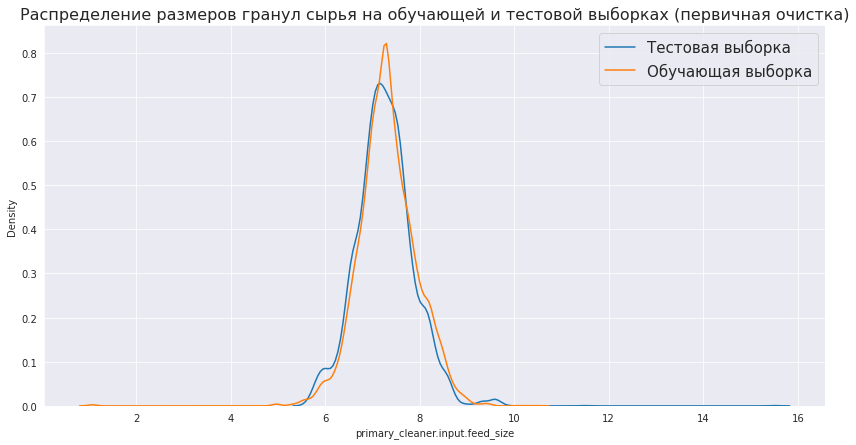

In [52]:
feedSize(primary_feed_size)
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках (первичная очистка)', fontsize=16)

              test         train
count  5290.000000  14149.000000
mean     55.952754     60.239856
std      19.080334     23.005310
min       0.046369      9.659576
25%      43.906504     48.966751
50%      50.846843     55.269784
75%      62.451165     66.007526
max     392.494040    484.967466


Text(0.5, 1.0, 'Распределение размеров гранул сырья на обучающей и тестовой выборках (флотация)')

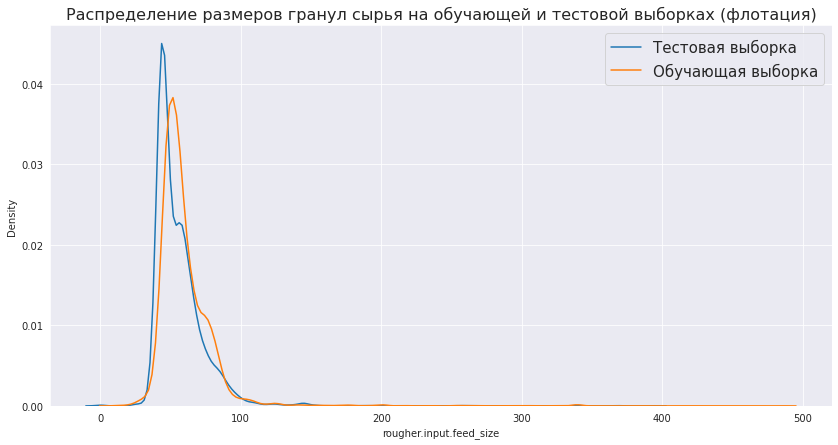

In [53]:
feedSize(rougher_feed_size)
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках (флотация)', fontsize=16)

Вывод: распределение на двух этапах примерно одинаковое. Данные не скажутся негативно на оценки моделей.

### Шаг 2.3 Исследуем суммарную концентрацию всех веществ на разных стадиях

Создадим словарь с металлами и выделим необходимые нам этапы. Далее будем складывать концентрацию всех металлов по-этапно.

In [54]:
first = 'rougher.input.feed_'
second = 'rougher.output.concentrate_'
third = 'final.output.concentrate_'

In [55]:
df_full_copy['сырье'] = df_full_copy[[first+'au', first+'ag', first+'pb', first+'sol']].sum(axis=1)
df_full_copy['черновой концентрат'] = df_full_copy[[second+'au', second+'ag', second+'pb', second+'sol']].sum(axis=1)
df_full_copy['финальный концентрат'] = df_full_copy[[third+'au', third+'ag', third+'pb', third+'sol']].sum(axis=1)

<div class="alert-student">
<b>Комментарий студента:</b> 
Добавил
</div>

In [56]:
df_full_copy[['сырье','черновой концентрат','финальный концентрат']].describe()

,сырье,черновой концентрат,финальный концентрат
count,19439.000000,19439.000000,19439.000000
mean,57.320789,68.170865,68.653624
std,7.212680,12.491279,7.427536
min,0.040000,0.000000,0.000000
25%,53.557679,66.012495,67.932362
50%,57.594391,70.181495,69.598444
75%,61.953459,74.356904,71.368472
max,76.978947,88.140119,80.210644


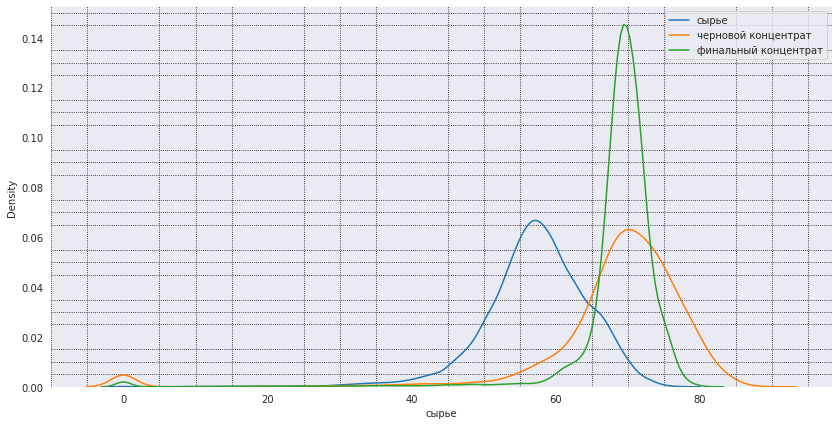

In [57]:
f, ax = plt.subplots(figsize=(14, 7))
sns.kdeplot(x=df_full_copy['сырье'],
            label='сырье');
sns.kdeplot(x=df_full_copy['черновой концентрат'],
            label='черновой концентрат');
sns.kdeplot(x=df_full_copy['финальный концентрат'],
            label='финальный концентрат');
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend(fontsize = 10);

Как видно на графиках, распределения ненормированные, данные скошены влево.

<AxesSubplot:>

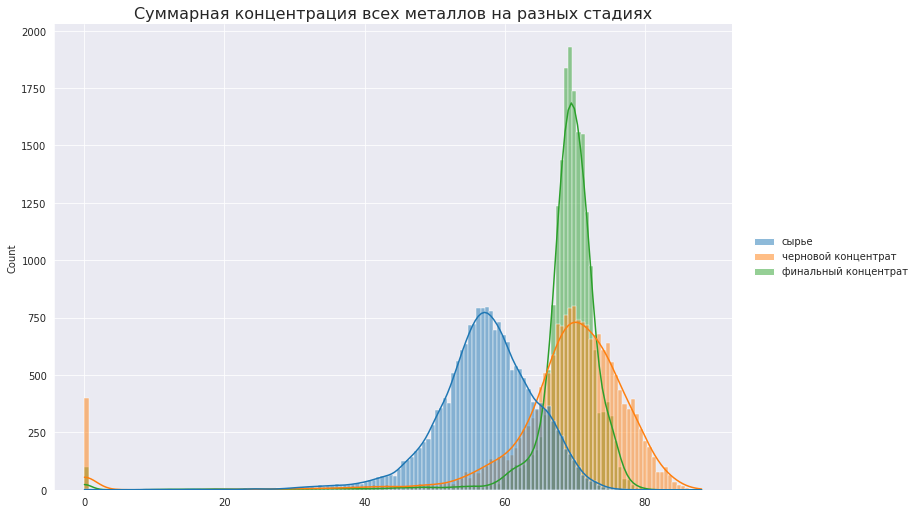

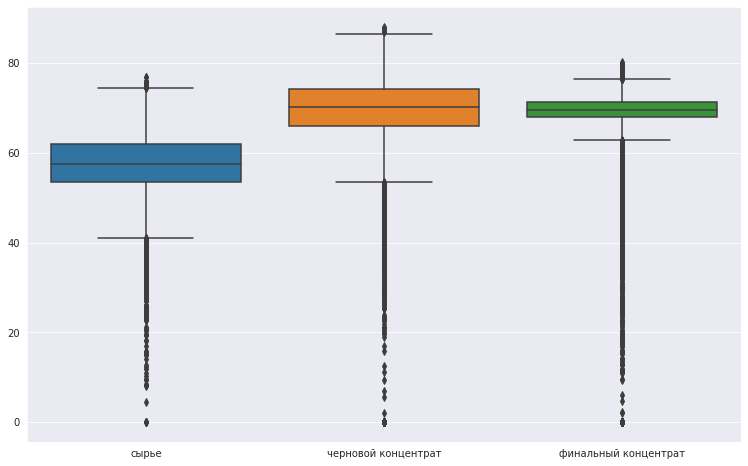

In [58]:
cols = ['сырье', 'черновой концентрат', 'финальный концентрат']

sns.displot(df_full_copy[cols], 
            legend=True, 
            kde=True, 
            height=7, 
            aspect=1.5)
plt.title('Суммарная концентрация всех металлов на разных стадиях', fontsize=16)
    
plt.figure(figsize=(12.8,8))
plt.xticks(rotation=0)
sns.boxplot(data=df_full_copy[cols])

Ящик с усами указывает нам на большое количество выбросов в данных. Однозначно их стоит удалить для улучшения работы модели. Также замечено, что в некоторых случая сумма металлов равняется нулю, что также не несет нам никаких полезных данных.

Посчитаем количество элементов, где сумма меньше 1 или равна нулю.

In [59]:
for col in cols:
    print(col,'zero:',len(df_full_copy[df_full_copy[col] == 0]))
    print(col,'<1:',len(df_full_copy[df_full_copy[col] < 1]))

сырье zero: 0
сырье <1: 5
черновой концентрат zero: 394
черновой концентрат <1: 399
финальный концентрат zero: 98
финальный концентрат <1: 99


Удалим такие элементы.

In [60]:
df_full_clean = df_full_copy[
    (df_full_copy['сырье'] >  1) & 
    (df_full_copy['черновой концентрат'] > 1) & 
    (df_full_copy['финальный концентрат'] > 1)
]

Text(0.5, 1.0, 'Суммарная концентрация всех металлов на разных стадиях после удаления')

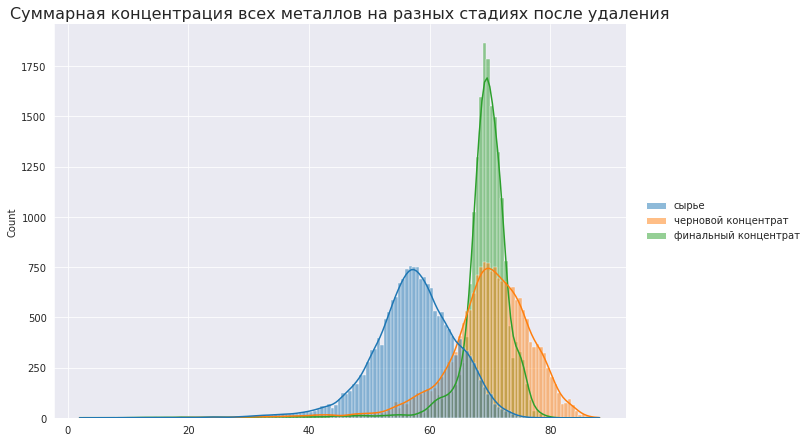

In [61]:
sns.displot(df_full_clean[cols], 
            legend=True, 
            kde=True, 
            height=6, 
            aspect=1.5)
plt.title('Суммарная концентрация всех металлов на разных стадиях после удаления', fontsize=16)

Теперь разберемся с выбросами. 

In [62]:
df_train_copy

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,...,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,89.574376,73.755150
16856,2018-08-18 07:59:59,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,...,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,87.724007,69.049291
16857,2018-08-18 08:59:59,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,...,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,88.890579,67.002189
16858,2018-08-18 09:59:59,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,65.523246


In [63]:
def delete_data(df, df_define, column):
    q1 = df_define[column].quantile(0.25)                 
    q3 = df_define[column].quantile(0.75)
    iqr = q3 - q1
    filter_data = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    return df.loc[filter_data]

In [64]:
scope = df_full_clean[df_full_clean['date'].isin(df_train_copy['date'])]

In [65]:
for col in cols:
    print(col, 'До удаления', df_full_clean[df_full_clean['date'].isin(df_train_copy['date'])][col].mean())
    print(col, 'После удаления', delete_data(df_full_clean, scope,col)[col].mean())

сырье До удаления 56.24369185384284
сырье После удаления 57.78570190481739
черновой концентрат До удаления 68.63939287985946
черновой концентрат После удаления 70.40657789187999
финальный концентрат До удаления 68.67059526323723
финальный концентрат После удаления 69.79884558931808


Удалим строки с выбросами

In [66]:
filter_data = delete_data(df_full_clean, scope,'сырье')
filter_data = delete_data(df_full_clean, scope,'черновой концентрат')
filter_data = delete_data(df_full_clean, scope,'финальный концентрат')

Посчитаем количество элементов, где сумма меньше 1 или равна нулю в новом датасете

In [67]:
for col in cols:
    print(col,'zero:',len(filter_data[filter_data[col] == 0]))
    print(col,'<1:',len(filter_data[filter_data[col] < 1]))

сырье zero: 0
сырье <1: 0
черновой концентрат zero: 0
черновой концентрат <1: 0
финальный концентрат zero: 0
финальный концентрат <1: 0


Все окей.Посмотрим на распределениие величин.

In [68]:
filter_data[['сырье','черновой концентрат','финальный концентрат']].describe()

,сырье,черновой концентрат,финальный концентрат
count,17692.000000,17692.000000,17692.000000
mean,57.791702,69.947691,69.798846
std,6.602574,7.001210,2.499956
min,10.209166,9.445924,62.472989
25%,53.938743,66.667257,68.226331
50%,57.821477,70.492694,69.712001
75%,62.169315,74.477636,71.383469
max,76.100011,87.273435,76.043562


<p>Как видим, средние значения немного выросли. Количество строк уменьшилось с 19439 до 17860.</p>
<p>Актуализируем выборки в тестовых и обучающих выборках перед обучением моделей.</p>

In [69]:
train = df_train_copy[df_train_copy['date'].isin(filter_data['date'])]
test = df_test_copy[df_test_copy['date'].isin(filter_data['date'])]

print('Обучающая выборка', train.shape)
print('Тестовая выборка', test.shape)

Обучающая выборка (12858, 55)
Тестовая выборка (4834, 55)


## Шаг 3. Построим модель. <a id='step3'></a>

### Шаг 3.1 Напишем функцию для расчета sMAPE

In [70]:
def sMAPE(target, predictions):
    numerator = np.abs(target - predictions)
    denominator = np.abs(target) + np.abs(predictions)
    smape = np.sum(numerator/denominator *2) * 100/len(target)
    return smape

In [71]:
def total_sMape(rougher, final):
    total_sMape = 0.25 * rougher + 0.75 * final
    return total_sMape

Выделим необходимые признаки.

In [72]:
target_rougher_train = train['rougher.output.recovery']
target_final_train = train['final.output.recovery']
features_train = train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

target_rougher_test = test['rougher.output.recovery']
target_final_test = test['final.output.recovery']
features_test = test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

Поскольку данные слишком различны, следует из стандартизировать.

In [73]:
numeric = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [74]:
features_train

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.207580,0.387754,-0.115435,0.295628,-0.439090,-0.267679,-0.423444,-0.825176,-0.428811,-0.242717,...,-1.068240,-0.474492,-0.635789,-0.762493,-1.172700,-0.372978,-0.850943,-0.423623,-0.934754,-2.769021
1,-0.245386,0.437503,-0.115435,0.333152,-0.236721,-0.326239,-0.239026,-0.304433,-0.235991,-0.262003,...,-1.072571,-0.534220,-0.664104,-0.704785,-1.153305,-0.421687,-0.867317,-0.426502,-0.961223,-2.599483
2,-0.292152,0.739641,-0.115435,0.302392,-0.042032,-0.299581,-0.055212,-0.327793,-0.043989,-0.308245,...,-1.068561,-0.475144,-0.671258,-0.701406,-1.147900,-0.420617,-0.862294,-0.424829,-0.955979,-2.645409
3,-0.332203,0.741376,-0.115435,0.317163,-0.054205,-0.327615,-0.053162,-0.298488,-0.056534,-0.304020,...,-1.064769,-0.442190,-0.654814,-0.702434,-1.165064,-0.396325,-0.868600,-0.418054,-0.959978,-2.605333
4,-0.442876,0.916574,-0.115435,0.352600,-0.043692,-0.269540,-0.047305,-0.318834,-0.061866,-0.308783,...,-1.066394,-0.422012,-0.663622,-0.700051,-1.172687,-0.461412,-0.882934,-0.420647,-0.961519,-2.647350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,-0.303473,-0.234090,-1.333180,1.147037,0.317334,2.627657,0.308527,2.828876,0.299826,2.710392,...,0.521856,-0.448344,0.862875,-0.677648,0.206667,-0.412897,-0.001854,-0.415460,0.078507,0.158323
16856,-0.368181,-0.253725,-1.333180,1.142142,0.328061,2.640916,0.313157,2.848979,0.300401,2.655905,...,0.509262,-0.457155,0.868198,-0.686367,0.205386,-0.427585,-0.009974,-0.408714,0.071700,0.165458
16857,-0.761349,-0.255954,-1.333180,1.178595,0.323051,2.642160,0.311949,2.850354,0.294797,2.691816,...,0.519073,-0.459113,0.852197,-0.679643,0.208972,-0.429051,0.001996,-0.409212,0.075574,0.152106
16858,-0.936727,-0.247349,-1.333180,0.978997,0.302968,2.668946,0.304542,2.828133,0.302329,2.705702,...,0.520704,-0.448056,0.871697,-0.687447,0.202139,-0.398191,-0.003357,-0.410814,0.079570,0.177110


### Шаг 3.2 Обучим разные модели и оценим их качество кросс-валидацией

Приступим к обучению моделей. Проверим, на каких параметрах получается наилучший результат у моделей.

In [75]:
smape_score = make_scorer(sMAPE, greater_is_better= False )

In [76]:
clf = DecisionTreeRegressor(random_state=12345)
parametrs = { 'max_depth': range (1,10)}
grid_rougher = GridSearchCV(clf, parametrs, cv=5, scoring = smape_score)
grid_final = GridSearchCV(clf, parametrs, cv=5, scoring = smape_score)
res_rougher = grid_rougher.fit(features_train, target_rougher_train)
res_final = grid_final.fit(features_train, target_final_train)
print(res_rougher.best_score_, res_rougher.best_params_)
print(res_final.best_score_, res_final.best_params_)

-6.895189812294474 {'max_depth': 3}
-9.00539003312954 {'max_depth': 3}


У дерева решений наилучшие показатели целевых признаков достигаются при глубине 3.

Наилучший показатель для случайного дерева зададим сразу, так как очень долго идет процесс подброра (глубина 4 и количество деревьев - 20.

In [77]:
clf = RandomForestRegressor()
parametrs = { 'max_depth': [3], 'n_estimators': [20]}
grid_rougher = GridSearchCV(clf, parametrs, cv=5, scoring = smape_score)
grid_final = GridSearchCV(clf, parametrs, cv=5, scoring = smape_score)
res_rougher = grid_rougher.fit(features_train, target_final_train)
res_final = grid_final.fit(features_train, target_rougher_train)
print(res_rougher.best_score_, res_rougher.best_params_)
print(res_final.best_score_, res_final.best_params_)

-8.809547687018759 {'max_depth': 3, 'n_estimators': 20}
-6.780035745575159 {'max_depth': 3, 'n_estimators': 20}


Посмотрим на показатели ленийной регрессии.

In [78]:
model = LinearRegression()
score_rougher = cross_val_score(model, features_train, target_rougher_train, cv = 5, scoring = smape_score)
score_final = cross_val_score(model, features_train, target_final_train, cv = 5, scoring = smape_score)
print(score_rougher.mean())
print(score_final.mean())

-6.982977652822129
-10.138273274712557


<div>
<b>Комментарий студента:</b> 
Поправил
</div>

Показатели в линейной регресии устапают деревьям.

Рассчитаем SMAPE для лучшей модели.

In [79]:
%%time 
results = []
model = RandomForestRegressor(random_state=12345, 
                                       n_estimators=20, 
                                       max_depth=3)
        
smape_score = make_scorer(sMAPE, greater_is_better= False )
    
cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=5, scoring=smape_score).mean()
cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=5, scoring=smape_score).mean()

smape_final_result = total_sMape(cross_val_score_rougher, cross_val_score_final)

results.append({'model name': model.__class__.__name__, 
                        'Params': {'random_state': 12345, 
                                            'n_estimators': 20, 
                                            'max_depth':3}, 
                        'smape_final_result': smape_final_result})

pd.DataFrame(results).style.highlight_max(color = 'lightgreen', axis = 0)

CPU times: user 21.8 s, sys: 20.6 ms, total: 21.8 s
Wall time: 22.7 s


,model name,Params,smape_final_result
0,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 20, 'max_depth': 3}",-8.34621


### Шаг 3.3 Проверим модель на тестовой выборке

Обучим и получим список предсказанных значений на тестовой выборке. 

In [80]:
model = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=3)
model.fit(features_train, target_rougher_train) 
predictions_rougher = model.predict(features_test)
model.fit(features_train, target_final_train) 
predictions_final = model.predict(features_test)



In [81]:
smape_rougher = sMAPE(target_rougher_test, predictions_rougher)
smape_final = sMAPE(target_final_test, predictions_final)
smape_test_result = total_sMape(smape_rougher, smape_final)
print('Итоговый sMAPE:',smape_test_result)

Итоговый sMAPE: 6.7814225806521655


Проверим полученный результат на адекватность. Для этого воспользуемся каким-либо простым алгоритмом для предсказания значений, например Dummy.

In [82]:
dummy_regr = DummyRegressor(strategy='mean')

dummy_regr.fit(features_train, target_rougher_train) 
dummy_rougher = dummy_regr.predict(features_test)

dummy_regr.fit(features_train, target_final_train)
dummy_final = dummy_regr.predict(features_test)


In [83]:
smape_rougher_dummy = sMAPE(target_rougher_test, dummy_rougher)
smape_final_dummy = sMAPE(target_final_test, dummy_final)

print('Итоговое sMAPE', total_sMape(smape_rougher_dummy, smape_final_dummy))

Итоговое sMAPE 7.1987825382514


Как видим, процентное отклонение нашей модели ниже, чем у случайного регрессора, что может говорить нам о ее эффективности.

## Шаг 4. Вывод

<p>Задачей проекта стояла составление модели машинного обучения для предсказания к-та восстановления золота из руды. В ходе работы были пройдены следующие этапы:</p>
<ul>
<li>Подготовка данных, в ходе которой был проведен анализ: дубликатов, пустых значений, корректности рассчета эффективности обогащения, признаков в тестовой и обучающей выборке</li>
<li>Анализ данных, который заключался в исследовании изменений концентрации металлов на различных этапах очистки, распределения размеров гранул сырья, и суммарной концентрации всех веществ</li>
<li>Построение модели обучения для вычисления итогового sMAPE и ее тестирование</li>
</ul>
<p>Результаты пройденных этапов:</p>
<ul>
<li>В ходе подготовки данных было выявлено, что почти 14% в строках целевого признака отсутсвуют данные. Тестовые данные не содержат в себе целевые признаки rougher.output.recovery, final.output.recovery. Расчет эффективности обогащения выполнен верно. Сильной корреляции для целевых признаков не выявлено. Обучающая и тестовая выборки были преобразованы, и в результате они имели одинаковое количество столбцов. Было выявлено, что данные по целевому признаку пропадают с периодичностью. На выходе имели данные без пропусков. </li>
<li>Анализ данных показал, что концентрация серебра уменьшается с каждым этапом, а золота - наоборот, увеличивается. Распределение размера гранул сырья примерно одинакова на обучающей и тестовой выборке. В ходе анализа суммарной концентрации веществ выбло выявлено, что в данных содержались строки с показателями 0 и меньше 1. Такие элементы были удалены для улучшения работы модели. Кроме этого были удалены выбросы данных.</li>
<li>Перед построением модели были подготовлены формулы по расчету sMAPE. Обучены модели DecisionTreeRegressor,RandomForestRegressor, LinearRegression. Выбрана для обучения на тестовой выборке RandomForestRegressor с показателями n_estimators=20, max_depth=3. Финальный показатель sMAPE составил 6,78, и он оказался ниже чем на случайной модели (7,19). Это говорит нам об эффективности данной модели обучения.</li>
<ul>